In [1]:
# Dependencies
import requests
import pandas as pd
import numpy as np
from config import league_id, espn_s2, swid
import ESPNFFPlayerData as ff

import matplotlib.pyplot as plt

In [2]:
# Define URL parameters
league_id = league_id

# Define cookie parameters
espn_s2 = espn_s2
swid = swid

# Define the week and year to pull
year = 2022
week = 2

# Define how many teams are in the league and the roster size
league_size = 10
roster_size = 16

In [4]:
# Load the league using load_league
# Parameters are league ID, year, week, swid, espn_s2
# Output is a JSON
league = ff.load_league(league_id, year, week, swid, espn_s2)

In [6]:
# Load team names using load_player_data
# Parameter are the league loaded previously, week, league_size, roster_size
# Output is a DataFrame
df = ff.load_player_data(league, week, league_size, roster_size)
df

,Week,PlayerName,PlayerScoreActual,PlayerScoreProjected,PlayerRosterSlotId,PlayerFantasyTeam,PlayerRosterSlot
0,2,Najee Harris,13.90,16.327594,2,1,RB
1,2,Dalvin Cook,7.60,17.985110,2,1,RB
2,2,A.J. Brown,11.90,14.978805,4,1,WR
3,2,Diontae Johnson,13.70,13.929698,4,1,WR
4,2,Darnell Mooney,0.60,11.553085,20,1,Bench
...,...,...,...,...,...,...,...
155,2,Mike Gesicki,14.10,5.400252,20,14,Bench
156,2,Pat Freiermuth,12.20,9.759137,6,14,TE
157,2,Trey Lance,2.82,20.267022,20,14,Bench
158,2,Cowboys D/ST,9.00,9.133034,16,14,D/ST


In [ ]:
# Load the league using load_team_data
# Parameters are the previously loaded DataFrame, league ID, year, week, swid, espn_s2
# Output is a DataFrame
df = ff.load_team_data(df, league_id, year, week, swid, espn_s2)

In [7]:
# Analysis and visualizations
df[df['PlayerFantasyTeam'] == 3]

,Week,PlayerName,PlayerScoreActual,PlayerScoreProjected,PlayerRosterSlotId,PlayerFantasyTeam,PlayerRosterSlot
32,2,Joe Mixon,11.30,16.581287,2,3,RB
33,2,Stefon Diggs,44.80,17.250412,4,3,WR
34,2,Mike Evans,9.10,13.785956,4,3,WR
35,2,Michael Pittman Jr.,0.00,0.000000,21,3,IR
36,2,Allen Robinson II,15.30,11.693303,20,3,Bench
37,2,Tony Pollard,19.80,9.201296,23,3,FLEX
38,2,Chris Godwin,0.00,0.000000,20,3,Bench
39,2,Amari Cooper,25.10,10.816094,20,3,Bench
40,2,Jalen Hurts,37.61,24.576370,0,3,QB
41,2,Zach Ertz,15.50,8.866147,20,3,Bench


In [18]:
bench_df = df[df['PlayerRosterSlot'] == 'Bench']
#bench_df = df.groupby(df['PlayerFantasyTeam']).sum()

In [19]:
bench_df

,Week,PlayerName,PlayerScoreActual,PlayerScoreProjected,PlayerRosterSlotId,PlayerFantasyTeam,PlayerRosterSlot
4,2,Darnell Mooney,0.60,11.553085,20,1,Bench
7,2,Christian Kirk,25.80,12.614030,20,1,Bench
8,2,James Robinson,15.80,11.412180,20,1,Bench
10,2,Melvin Gordon III,6.30,11.409716,20,1,Bench
11,2,Marquez Valdes-Scantling,3.30,11.230340,20,1,Bench
...,...,...,...,...,...,...,...
152,2,Rashod Bateman,20.80,11.251054,20,14,Bench
153,2,Tom Brady,11.48,21.420306,20,14,Bench
154,2,Rhamondre Stevenson,6.10,10.629787,20,14,Bench
155,2,Mike Gesicki,14.10,5.400252,20,14,Bench


<BarContainer object of 10 artists>

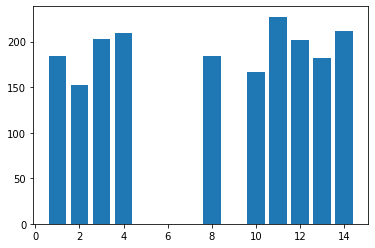

In [16]:
plt.bar(bench_df.index, bench_df['PlayerScoreActual'])